In [1]:
import pandas as pd
from pandas import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_zr(time):
    Data = pd.read_csv('zcyc_range_calculator.csv', sep=';', index_col='tradedate')
    for i in Data.index:
        for j in Data.columns:
            Data[j][i] = Data[j][i].replace(',', '.')
    Data = Data.astype(float)
    Data.columns =[0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75,3,3.25,3.5,3.75,4,4.25,4.5,4.75,5,5.25,5.5,5.75,6,6.25,6.5,6.75,7,7.25,7.5,7.75,8,8.25,8.5,8.75,9,9.25,9.5,9.75,10,10.25,10.5,10.75,11,11.25,11.5,11.75,12,12.25,12.5,12.75,13,13.25,13.5,13.75,14,14.25,14.5,14.75]
    Dataindex =[0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75,3,3.25,3.5,3.75,4,4.25,4.5,4.75,5,5.25,5.5,5.75,6,6.25,6.5,6.75,7,7.25,7.5,7.75,8,8.25,8.5,8.75,9,9.25,9.5,9.75,10,10.25,10.5,10.75,11,11.25,11.5,11.75,12,12.25,12.5,12.75,13,13.25,13.5,13.75,14,14.25,14.5,14.75]

    zr = []
    for i in range(0, len(time)):
        if time[i] <= Dataindex[i * 2]:
            zr.append(((1 - (Dataindex[i * 2] - time[i]) / 0.25) * (Data.iloc[0,i * 2 + 1] - Data.iloc[0,i * 2]) + Data.iloc[0,i * 2])/100)
        else:
            zr.append(((1 - (Dataindex[i * 2+1] - time[i]) / 0.25) * (Data.iloc[0,i * 2 + 2] - Data.iloc[0,i * 2+1]) + Data.iloc[0,i * 2+1])/100)
    return pd.DataFrame(zr), Data

In [3]:
Data = pd.DataFrame([[1000, 1000 * 0.75246, 34.9, 2, 169/365,4901/365, 27], [1000, 1000 * 0.954, 47.37, 2, 91 / 365, 3549/365, 20], [1000, 1000 * 0.98179, 40.64, 2, 161/365, 1435/365, 8],[1000, 1000 * 0.96487, 44.88, 2, 190/365, 2374/365, 13]], columns=['FV', 'PV', 'cuopon', 'FC', 'date_first_coupon', 'maturity', 'payment'], index = ['ОФЗ26240', 'ОФЗ26241', 'ОФЗ26207', 'ОФЗ26242'])
Data

,FV,PV,cuopon,FC,date_first_coupon,maturity,payment
ОФЗ26240,1000,752.46,34.90,2,0.463014,13.427397,27
ОФЗ26241,1000,954.00,47.37,2,0.249315,9.723288,20
ОФЗ26207,1000,981.79,40.64,2,0.441096,3.931507,8
ОФЗ26242,1000,964.87,44.88,2,0.520548,6.504110,13


In [4]:
o = 0
face_value = Data['FV'][o]
PV = Data['PV'][o]
value_coupon = Data['cuopon'][o]
frequantly_coupon = Data['FC'][o]
date_first_coupon = Data['date_first_coupon'][o]
maturity = Data['maturity'][o]
time = np.linspace(Data['date_first_coupon'][o], Data['maturity'][o], Data['payment'][o])

In [5]:
def present_value(face_value, value_coupon, frequantly_coupon, time, y):
    zr = pd.DataFrame([y] * len(time))
    calculatorcc = 0
    calculator = 0
    for i in range(0, len(time)):
        calculatorcc += value_coupon * np.exp(-zr[0][i] * time[i])
    calculatorcc += face_value * np.exp(-zr[0][i] * time[i])
    for i in range(0, len(time)):
        calculator += value_coupon / (1 + zr[0][i]) ** time[i]
    calculator += face_value / (1 + zr[0][i]) ** time[i]
    return calculatorcc, calculator

def fair_value(face_value, value_coupon, frequantly_coupon, time, zr):
    calculatorcc = 0
    calculator = 0
    for i in range(0, len(time)):
        calculatorcc += value_coupon * np.exp(-zr[0][i] * time[i])
    calculatorcc += face_value * np.exp(-zr[0][i] * time[i])
    for i in range(0, len(time)):
        calculator += value_coupon / (1 + zr[0][i]) ** time[i]
    calculator += face_value / (1 + zr[0][i]) ** time[i]
    return calculatorcc, calculator

def fx(face_value, value_coupon, frequantly_coupon, time, y, PV):
    calculator = 0
    for i in range(0, len(time)):
        calculator += value_coupon * np.exp(- y * time[i])
    calculator += face_value * np.exp(- y * time[i]) - PV
    return calculator


def fx1(face_value, value_coupon, frequantly_coupon, time, y, PV):
    calculator = 0
    for i in range(0, len(time)):
        calculator += - value_coupon * time[i] * np.exp(- y * time[i])
    calculator += - face_value * time[i] * np.exp(- y * time[i]) - PV
    return calculator
    

def bond_yield(face_value, value_coupon, frequantly_coupon, time, y, PV):
    x = fx(face_value, value_coupon, frequantly_coupon, time, y, PV)
    x1 = fx1(face_value, value_coupon, frequantly_coupon, time, y, PV)
    y = y - x / (x1)
    while np.abs(x) > 0.000001:
        x = fx(face_value, value_coupon, frequantly_coupon, time, y, PV)
        x1 = fx1(face_value, value_coupon, frequantly_coupon, time, y, PV)
        y = y - x / (x1)
    return y, frequantly_coupon * (np.exp(y/frequantly_coupon) - 1)

def par_bond_yield(data, frequantly_coupon, time):
    m = frequantly_coupon
    mn = len(time)
    d = np.exp(- data[0][mn-1] * time[mn-1])
    A = 0
    for i in range(0, mn):   
        A += np.exp(- data[0][i] * time[i])
    c = (100 - 100 * d) * m / A
    return c
    
def get_duration(face_value, value_coupon, frequantly_coupon, time, y):
    duration = 0
    Data = pd.DataFrame([y] * len(time))     
    PV, _ = present_value(face_value, value_coupon, frequantly_coupon, time, y)
    for i in range(0, len(time)):
        duration += value_coupon * time[i] * np.exp(-y * time[i]) / PV
    duration += face_value * time[i] * np.exp(-y * time[i]) / PV
    return duration, duration * 365

def get_convexity(face_value, value_coupon, frequantly_coupon,time, y):
    convexity = 0
    Data = pd.DataFrame([y] * len(time))     
    PV, _ = present_value(face_value, value_coupon, frequantly_coupon, time, y)
    for i in range(0, len(time)):
        convexity += value_coupon * time[i] ** 2 * np.exp(-y * time[i]) / PV
    convexity += face_value * time[i] ** 2 * np.exp(-y * time[i]) / PV
    return convexity
    
    

In [6]:
zr, _ = get_zr(time)
fair_value(face_value, value_coupon, frequantly_coupon, time, zr)

(730.8596493796184, 761.9564056592699)

In [7]:
y, ym = bond_yield(face_value, value_coupon, frequantly_coupon, time, 1, PV)
y, ym

(0.10249543484878298, 0.10516720857990514)

In [8]:
present_value(face_value, value_coupon, frequantly_coupon, time, y)

(752.4600000711567, 783.3637097617391)

In [9]:
get_duration(face_value, value_coupon, frequantly_coupon, time, y)

(8.124679732239327, 2965.5081022673544)

In [10]:
get_convexity(face_value, value_coupon, frequantly_coupon,time, y)

89.3474851369446

In [11]:
Data_y = np.linspace(y-0.09, y + 0.09, 1000)
Data_x_calculated = np.linspace(0,0,1000)
for ind, i in enumerate(Data_y):
    zr = pd.DataFrame([i] * len(time))
    PV,_ = present_value(face_value, value_coupon, frequantly_coupon, time, i)
    Data_x_calculated[ind] = PV

Data_x_duration = np.linspace(0,0,1000)
PV,_ = present_value(face_value, value_coupon, frequantly_coupon, time, y)
Duration,_ = get_duration(face_value, value_coupon, frequantly_coupon, time, y)
for ind, i in enumerate(Data_y):
    delta_B = - PV * Duration * (i - y)
    Data_x_duration[ind] = PV + delta_B
    
Data_x_convexity = np.linspace(0,0,1000)
PV,_ = present_value(face_value, value_coupon, frequantly_coupon, time, y)
Duration, _ = get_duration(face_value, value_coupon, frequantly_coupon, time, y)
Convexity = get_convexity(face_value, value_coupon, frequantly_coupon, time, y)
for ind, i in enumerate(Data_y):
    delta_B = - PV * Duration * (i - y) + 0.5 * Convexity * (i-y) ** 2 * PV
    Data_x_convexity[ind] = PV + delta_B

In [12]:
Data

,FV,PV,cuopon,FC,date_first_coupon,maturity,payment
ОФЗ26240,1000,752.46,34.90,2,0.463014,13.427397,27
ОФЗ26241,1000,954.00,47.37,2,0.249315,9.723288,20
ОФЗ26207,1000,981.79,40.64,2,0.441096,3.931507,8
ОФЗ26242,1000,964.87,44.88,2,0.520548,6.504110,13


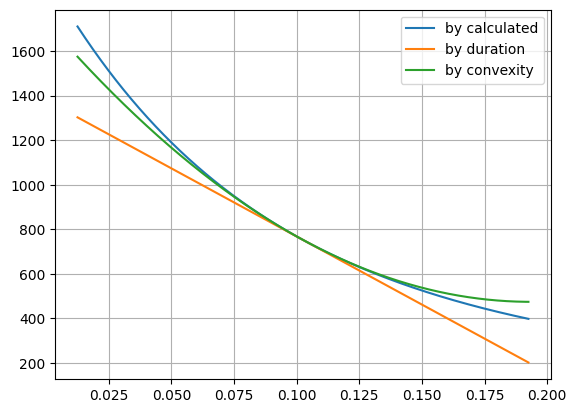

In [13]:
plt.plot(Data_y, Data_x_calculated, label='by calculated')
plt.plot(Data_y, Data_x_duration, label='by duration')
plt.plot(Data_y, Data_x_convexity, label='by convexity')
plt.legend()
plt.grid()



In [14]:
Data_x_yield = np.linspace(0,0,1000)
duration,_ = get_duration(face_value, value_coupon, frequantly_coupon, time, y)
for ind, i in enumerate(Data_y):
    Data_x_yield[ind] = Data_x_calculated[ind] * np.exp(i * duration)
    
    

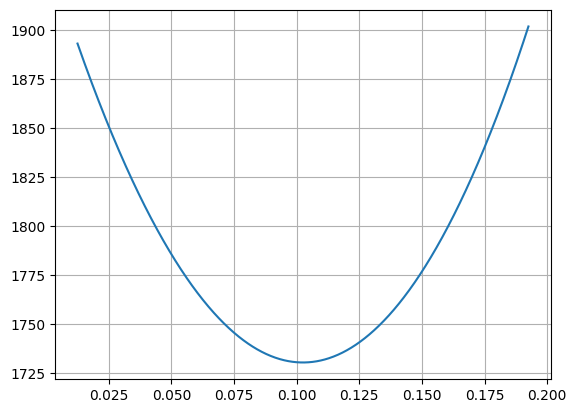

In [15]:
plt.plot(Data_y, Data_x_yield)
plt.grid()

In [16]:
Data = pd.read_csv('zcyc_range_calculator.csv', sep=';', index_col='tradedate')
for i in Data.index:
    for j in Data.columns:
        Data[j][i] = Data[j][i].replace(',', '.')
Data = Data.astype(float)
Data.columns =[0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75,3,3.25,3.5,3.75,4,4.25,4.5,4.75,5,5.25,5.5,5.75,6,6.25,6.5,6.75,7,7.25,7.5,7.75,8,8.25,8.5,8.75,9,9.25,9.5,9.75,10,10.25,10.5,10.75,11,11.25,11.5,11.75,12,12.25,12.5,12.75,13,13.25,13.5,13.75,14,14.25,14.5,14.75]
Dataindex =[0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75,3,3.25,3.5,3.75,4,4.25,4.5,4.75,5,5.25,5.5,5.75,6,6.25,6.5,6.75,7,7.25,7.5,7.75,8,8.25,8.5,8.75,9,9.25,9.5,9.75,10,10.25,10.5,10.75,11,11.25,11.5,11.75,12,12.25,12.5,12.75,13,13.25,13.5,13.75,14,14.25,14.5,14.75]

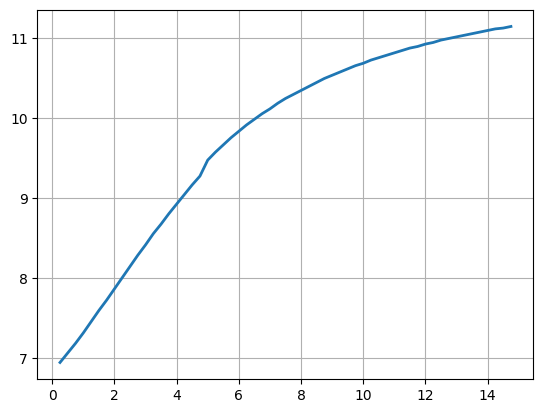

In [17]:
plt.plot(Data.iloc[0], linewidth=2)
plt.grid()